In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("/content/wine_data.csv" , header = None , usecols = [0,1,2])
df.columns = ["Class Label" , "Alcohol", "Malic Acid"]
df.head()

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

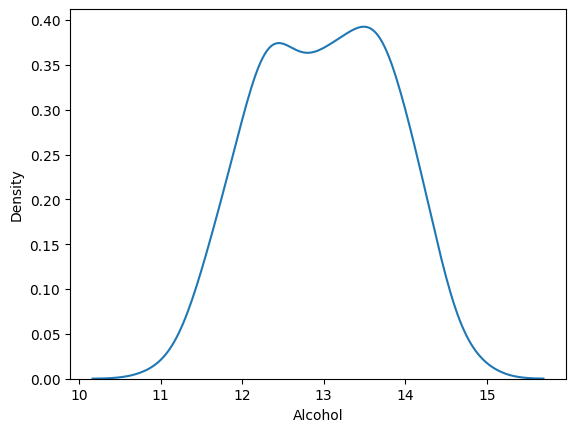

In [37]:
sns.kdeplot(df["Alcohol"])

<Axes: xlabel='Malic Acid', ylabel='Density'>

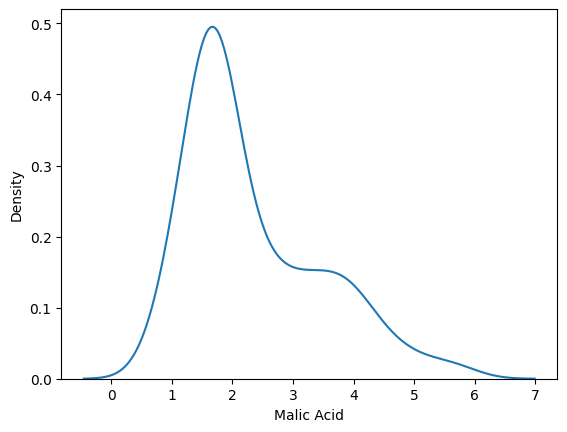

In [38]:
sns.kdeplot(df["Malic Acid"])

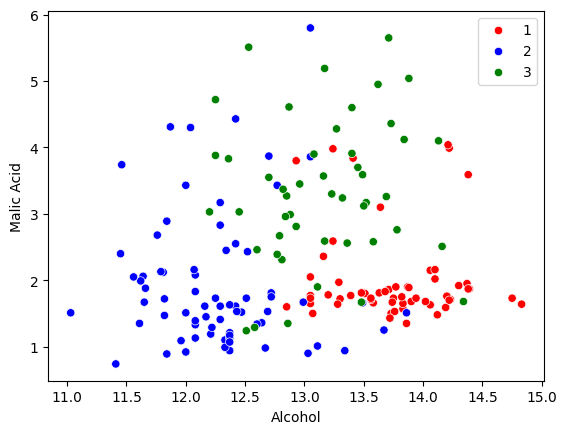

In [39]:
sns.scatterplot(x = "Alcohol", y = "Malic Acid" , data = df , hue = "Class Label" , palette= {1 : "red" , 2 : "blue" , 3 : "green"})
plt.legend()
plt.show()

In [41]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(df.drop("Class Label" , axis = 1) ,
                                                       df["Class Label"] ,
                                                       test_size = 0.2 ,
                                                       random_state = 0)

In [42]:
X_train.shape , X_test.shape

((142, 2), (36, 2))

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [44]:
X_train_scaled = pd.DataFrame(x_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(x_test_scaled , columns = X_test.columns)

In [45]:
np.round(X_train_scaled.describe(),2)

,Alcohol,Malic Acid
count,142.00,142.00
mean,0.53,0.33
std,0.22,0.23
min,0.00,0.00
25%,0.35,0.18
50%,0.54,0.24
75%,0.70,0.51
max,1.00,1.00


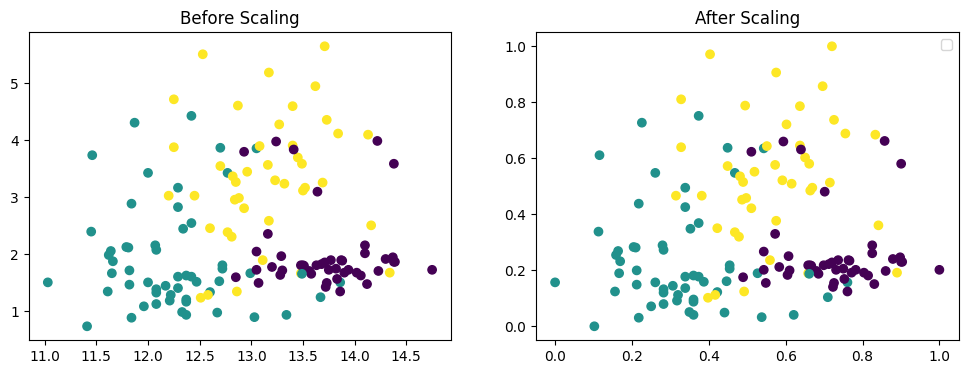

In [54]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (12,4))
## Before Scaling
ax1.set_title("Before Scaling")
ax1.scatter(X_train['Alcohol'] , X_train['Malic Acid'] , c = y_train )
## After Scaling
ax2.set_title("After Scaling")
ax2.scatter(X_train_scaled["Alcohol"] , X_train_scaled["Malic Acid"] , c = y_train)
plt.legend()
plt.show()

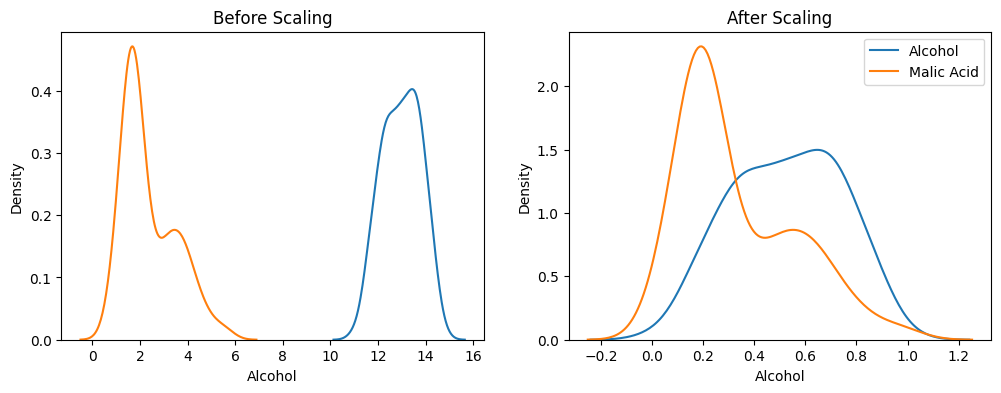

In [57]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (12,4))


# Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'] , ax = ax1 , label = "Alcohol")
sns.kdeplot(X_train['Malic Acid'] , ax = ax1 , label = "Malic Acid")
# After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'] , ax = ax2 , label = "Alcohol")
sns.kdeplot(X_train_scaled['Malic Acid'] , ax = ax2 , label = "Malic Acid")
plt.legend()
plt.show()

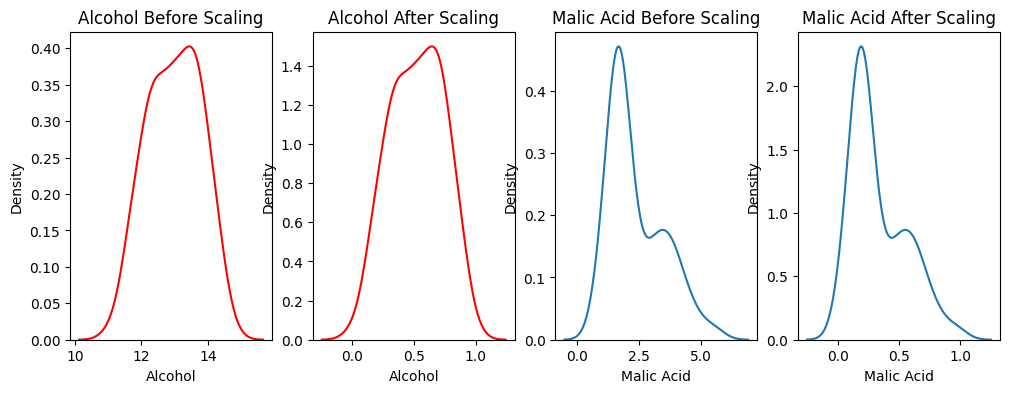

In [68]:
### Alcohol Dist plot

fig , (ax1 , ax2 , ax3 , ax4 ) = plt.subplots(ncols = 4 , figsize = (12,4))

# Before Scaling
ax1.set_title("Alcohol Before Scaling")
sns.kdeplot(X_train["Alcohol"] , ax = ax1 , color = "red")

# After Scaling
ax2.set_title("Alcohol After Scaling")
sns.kdeplot(X_train_scaled["Alcohol"] , ax = ax2 , color = "red")

# plt.show()



### Alcohol Dist plot

# fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (12,4))

# Before Scaling
ax3.set_title("Malic Acid Before Scaling")
sns.kdeplot(X_train["Malic Acid"] , ax = ax3)

# After Scaling
ax4.set_title("Malic Acid After Scaling")
sns.kdeplot(X_train_scaled["Malic Acid"] , ax = ax4)

plt.show()